# Modelling and Numerical Methods  <a class="tocSkip">

## Chapter 1: Vector and Tensor Calculus   <a class="tocSkip">

## Learning outcomes  <a class="tocSkip">
    
At the end of this session, you should be able to:

1. Compute vector and tensor operations by hand and using $\texttt{numpy}$. 
2. Describe differences and similarities between tensors and vectors.
3. Perform transformations on basis vectors and determine whether the resulting system is orthonormal.
4. Compute the spatial derivatives, divergence, gradient and curl of scalar/vector fields, and describe their meaning.
5. Interpret and simplify matrix identities using index notation and the Einstein convention.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Vector-Operations" data-toc-modified-id="Vector-Operations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vector Operations</a></span>
            <ul class="toc-item">
                <li><span><a href="#Scalar-(dot)-product" data-toc-modified-id="Scalar-(dot)-product-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scalar (dot) product</a></span></li>
                <li><span><a href="#Vector-(cross)-product" data-toc-modified-id="Vector-(cross)-product-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vector (cross) product</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exercise 1</a></span></li>
                        <li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Exercise 2</a></span></li>
                    </ul></li>
            </ul></li>
        <li><span><a href="#Coordinate-Transformations" data-toc-modified-id="Coordinate-Transformations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coordinate Transformations</a></span>
            <ul class="toc-item">
                <li><span><a href="#Orthonormal-Bases" data-toc-modified-id="Orthonormal-Bases-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Orthonormal Bases</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Exercise 3</a></span></li>
                        <li><span><a href="#Exercise-4" data-toc-modified-id="Exercise-4-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Exercise 4</a></span></li>
                    </ul></li>
            </ul></li>
        <li><span><a href="#Vector-Calculus" data-toc-modified-id="Vector-Calculus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vector Calculus</a></span>
            <ul class="toc-item">
                <ul class="toc-item">
                    <li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Exercise 5</a></span></li>
                    <li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Exercise 6</a></span></li>
                </ul>
             </ul></li>
        <li><span><a href="#Index-Notation" data-toc-modified-id="Index-Notation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Index Notation</a></span>
            <ul class="toc-item">
                <ul class="toc-item">
                    <li><span><a href="#Exercise-7" data-toc-modified-id="Exercise-7-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Exercise 7</a></span></li>
                    <li><span><a href="#Exercise-8" data-toc-modified-id="Exercise-8-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Exercise 8</a></span></li>
                </ul>
            </ul></li>
        <li><span><a href="#Vector-and-Tensor-Calculus" data-toc-modified-id="Vector-and-Tensor-Calculus-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vector and Tensor Calculus</a></span>
            <ul class="toc-item">
                <ul class="toc-item">
                    <li><span><a href="#Exercise-9" data-toc-modified-id="Exercise-9-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Exercise 9</a></span></li>
                    <li><span><a href="#Exercise-10" data-toc-modified-id="Exercise-10-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Exercise 10</a></span></li>
                </ul>
            </ul></li>
    </ul></div>

## Types of content
<div class="alert alert-info"> <b><font color=black>Exercises for all</font></b> </div>
<div class="alert alert-success"> <b><font color=black>Optional additional practise</font></b> </div>
<div class="alert alert-warning"> <b><font color=black>Optional advanced practise/content</font></b> </div>

## Settings for notebook

In [ ]:
def setup_figure(grid=False, scale=1.):
    fig = plt.figure(figsize=plt.figaspect(1))
    #fig.canvas.header_visible = False
    ax = plt.axes(projection='3d')
    # Add axis labels
    ax.set_xlabel('$e_1$')
    ax.set_ylabel('$e_2$')
    ax.set_zlabel('$e_3$')
    ax.set_xlim(-scale,scale)
    ax.set_ylim(-scale,scale)
    ax.set_zlim(-scale,scale)
    return ax

#Define x and y space
def init_grid(Lx=10., dx=None, Ly=10., dy=None):

    # Use 100 grid points if dx not specified
    if dx is None:
        dx = Lx/100.
    if dy is None:
        dy = Ly/100.
    
    # Construct the grid
    nx = int(Lx/dx)
    xx = np.linspace(-Lx, Lx, nx)
    ny = int(Lx/dx)
    yy = np.linspace(-Ly, Ly, ny)
    X, Y = np.meshgrid(xx, yy)
    
    return X, Y

def add_points(ax,x,y,z,clr='k',lbl='x'):
    ax.scatter(x, y, z, color=clr)
    ax.text(x, y, z, '%s' % (lbl), size=15, zorder=1, color='k')
    
def add_lines(ax,e,clr='k'):
    ax.plot3D(np.linspace(0,e[0],11), np.linspace(0,e[1],11), np.linspace(0,e[2],11), clr);
    




In [1]:
#%%capture
# Installing library that allows for interactive, responsive plots
#%pip install ipympl
# Loading'widget' responsive plot module, N.B. you may have to change the below to %matplotlib inline if you 
# have trouble getting this to work
#%matplotlib widget
#%precision 16
%matplotlib notebook

# Importing required libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np



Do not alter this cell. LaTeX commands for frequently used terms.

$$\newcommand{\tensor}[1]{\underline{\underline{\mathbf{#1}}}}$$
$$\newcommand{\vector}[1]{\mathbf{#1}}$$
$$\newcommand{\matrix}[1]{\mathbf{#1}}$$
$$\newcommand{\det}[1]{\mathrm{det}\left(#1\right)}$$
$$\newcommand{\ex}{\vector{\hat{e}}_1}$$
$$\newcommand{\ey}{\vector{\hat{e}}_2}$$
$$\newcommand{\ez}{\vector{\hat{e}}_3}$$
$$\newcommand{\nhat}{\vector{\hat{n}}}$$
$$\newcommand{\ehat}{\vector{\hat{e}}}$$
$$\newcommand{\xhat}{\vector{\hat{x}}}$$
$$\newcommand{\x}{\vector{x}}$$
$$\newcommand{\v}{\vector{v}}$$
$$\newcommand{\u}{\vector{u}}$$

In [32]:
#Define x and y space
def init_grid(Lx=10., dx=None, Ly=10., dy=None):

    # Use 100 grid points if dx not specified
    if dx is None:
        dx = Lx/100.
    if dy is None:
        dy = Ly/100.
    
    # Construct the grid
    nx = int(Lx/dx)
    xx = np.linspace(-Lx, Lx, nx)
    ny = int(Lx/dx)
    yy = np.linspace(-Ly, Ly, ny)
    X, Y = np.meshgrid(xx, yy)
    
    return X, Y

def plot_scalar_field(x,y,f,flabel="$\phi$(x,y)", contours=False):
    # Plot the velocity field at time zero
    fig = plt.figure()
    plt.subplot(aspect='equal')
    fig.canvas.header_visible = False
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Contour plot of velocity magnitude
    c = plt.contourf(X, Y, f)
    if (contours):
        plt.contour(X, Y, f, colors=['w'])
    cbar = plt.colorbar(c, shrink=0.8)
    cbar.ax.set_title(flabel)
   
def plot_vector_field(x, y, f, vx, vy, flabel=None, contours=False):
    # Plot the velocity field at time zero
    fig = plt.figure()
    plt.subplot(aspect='equal');
    fig.canvas.header_visible = False
    plt.xlabel('x');
    plt.ylabel('y');

    # Contour plot of velocity magnitude
    vcolor='k'
    if flabel is not None:
        c = plt.contourf(X, Y, f)
        if contours:
            plt.contour(X, Y, f, colors=['w'])
        cbar = plt.colorbar(c, shrink=0.8)
        cbar.ax.set_title(flabel)
        vcolor='w'
    
    # Plot vector arrows
    plt.quiver(x[::5,::5], y[::5,::5], vx[::5,::5], vy[::5,::5], color=vcolor)

<div class="alert alert-success"> <font color=black>

### Exercise 1
        
The following problems ask you to calculate various vector operations. If it's been a while since you did these or they are new, have a go at calculating them by hand first. Then see if you can code up and compute them using $\texttt{numpy}$. Otherwise, you may want to skip directly to coding these operations up using `np.dot`, `np.cross` and `np.linalg.norm`.
    
Assuming  

$\vector{a} = \begin{pmatrix}2 \\ -1 \\ 4 \end{pmatrix}$ and $\vector{b} = \begin{pmatrix}8 \\ 5 \\ -7 \end{pmatrix}$
    
calculate:


a) $\left|\vector{a}\right|$ and $\left|\vector{b}\right|$;

b) $\vector{a}\cdot\vector{b}$ and the angle between $\vector{a}$ and $\vector{b}$;

c) $\vector{a}\times\vector{b}$ and the area spanned by $\vector{a}$ and $\vector{b}$.


<div class="alert alert-info"> <font color=black>

### Exercise 2
    
a) What steps would be required to determine in a code whether two 2D vectors, $\mathbf{a}$ and $\mathbf{b}$, are linearly independent or not? Write them out.

b) How would you find components of a 3D vector $\mathbf{a}$ normal and parallel to 3D vector $\mathbf{b}$?


In [22]:
a = np.array([2, -1])
b = np.array([4,  -2])

# form a square matrix with a and b
# Calc the determinant
# det = 0 ==> linearly dependant
# det != 0 ==> linearly independant



# normal=cross product
# paralel= multiply by a constant

<div class="alert alert-success"> 
    <font color=black>
c) Plot up different assumed $\mathbf{a}$ and $\mathbf{b}$ vectors and test the identities derived above.
    </font>

In [23]:
matrix = np.array([a,b])
matrix
np.linalg.det(matrix)

0.0

<IPython.core.display.Javascript object>


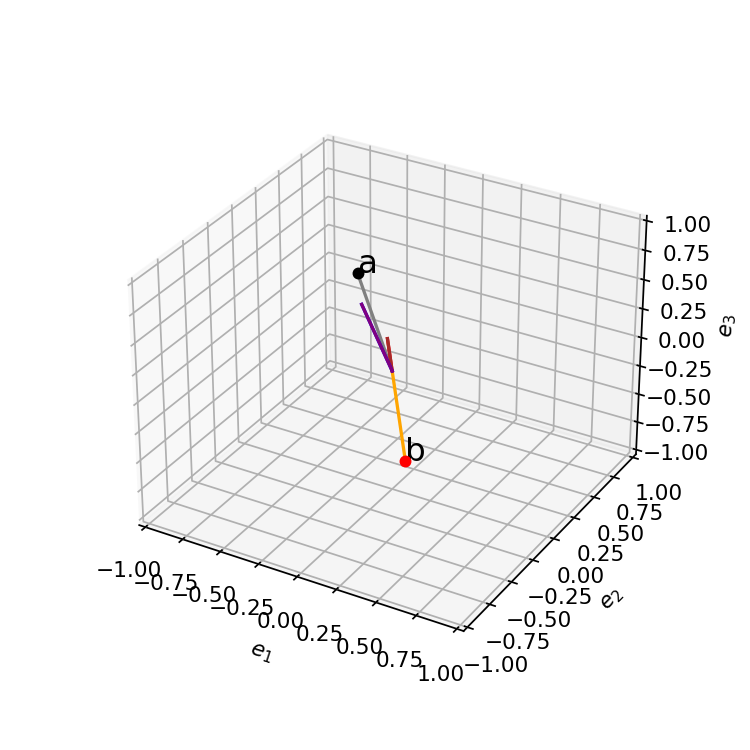

In [33]:
a = np.array([-0.4,0.3,0.5])
b = np.array([0.6,-0.9,0.1])

# Start figure
ax=setup_figure()

# Plot vectors
add_points(ax,a[0],a[1],a[2],clr='k',lbl='a')
add_points(ax,b[0],b[1],b[2],clr='r',lbl='b')
add_lines(ax,a[:],clr='gray')
add_lines(ax,b[:],clr='orange')

# ???
# Calculate and plot components of a that are parallel and perpendicular to b
# There are parameters for two different ways of calculating each component
a_par_b1=(1./np.linalg.norm(b))*np.dot(a,b)*(b/np.linalg.norm(b))
a_par_b2=np.dot(a,b/np.linalg.norm(b))*(b/np.linalg.norm(b))
add_lines(ax,a_par_b1[:],clr='red')
add_lines(ax,a_par_b2[:],clr='brown')
a_perp_b=a-np.dot(a,(b/np.linalg.norm(b)))*(b/np.linalg.norm(b))
a_perp_b2=np.cross(b/np.linalg.norm(b),np.cross(a,b/np.linalg.norm(b)))
add_lines(ax,a_perp_b[:],clr='blue')
add_lines(ax,a_perp_b2[:],clr='purple')

## Orthonormal Bases 

Orthonormal bases have several important properties. For example, reflection or rotation of an orthonormal basis in any real, *n*-dimensional coordinate space will generate another orthonormal basis. In fact, every possible orthonormal basis in a given coordinate space can be obtained by applying some combination of these transformations to the original basis. 

Another key feature is that using an orthonormal basis makes it simpler to work out the linear combination of basis vectors that represents a given vector in the coordinate space. For example, imagine $\textbf{v}_1$, $\textbf{v}_2$ and $\textbf{v}_3$ are a set of basis vectors for a real 3D space, we can express any vector in the space (i.e., $\textbf{v}\in\mathbb{R}^3$) using,
$\textbf{v} = x_1\textbf{v}_1 + x_2\textbf{v}_2 + x_3\textbf{v}_3$, where $x_1, x_2, x_3 \in \mathbb{R}$. If the basis is not orthonormal, although we know that appropriate $x_i$ coefficients must exist, we have no way of calculating them without solving a relatively complex system of equations. By contrast, if the basis is orthonormal, determining the values of $x_i$ becomes straightforward since the identity $x_i = \sum^3_{i=1} \textbf{v} \cdot \textbf{v}_i$ holds.  


<div class="alert alert-info"> <font color=black>   

### Exercise 3

Let $\hat{\mathbf{e}}_1$, $\hat{\mathbf{e}}_2$, $\hat{\mathbf{e}}_3$ be the set of standard orthonormal base vectors. We then define a new right-handed coordinate system by $\hat{\mathbf{e}}^\prime_1$, $\hat{\mathbf{e}}^\prime_2$, $\hat{\mathbf{e}}^\prime_3$ where:

$\hat{\mathbf{e}}^\prime_1 = \frac{1}{3}\left(2\hat{\mathbf{e}}_1 + 2\hat{\mathbf{e}}_2+\hat{\mathbf{e}}_3 \right)$,

$\hat{\mathbf{e}}^\prime_2 = \frac{1}{\sqrt{2}}\left(\hat{\mathbf{e}}_1- \hat{\mathbf{e}}_2\right)$,

$\hat{\mathbf{e}}^\prime_3 = \frac{1}{3\sqrt{2}}\left(\hat{\mathbf{e}}_1 + \hat{\mathbf{e}}_2-4\hat{\mathbf{e}}_3\right)$.
    

a) Plot up the original and transformed basis vectors using Python.
    
*NB - some plotting functions are already provided to help you on your way.* 

<IPython.core.display.Javascript object>


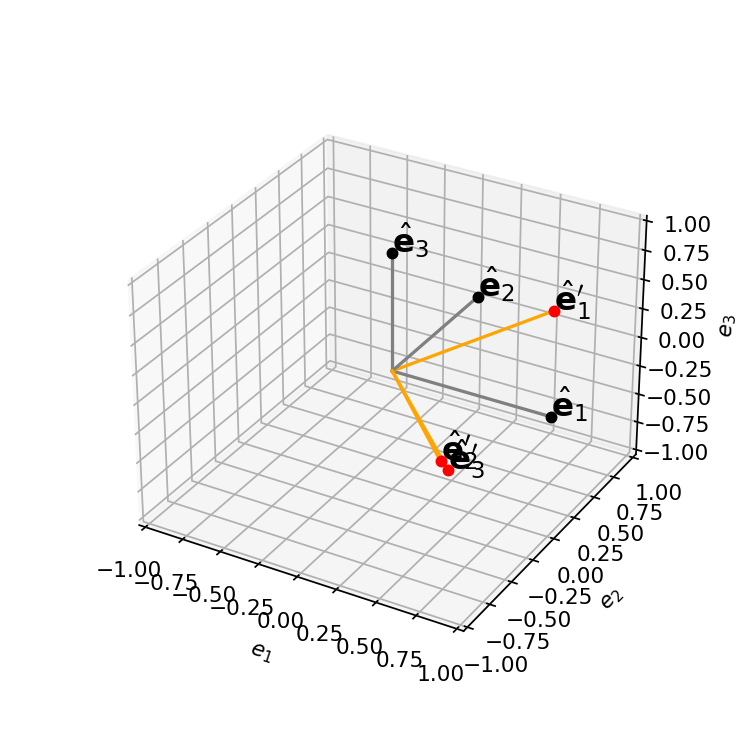

In [34]:
# Construct arrays for original basis
e1=np.array([1,0,0])
e2=np.array([0,1,0])
e3=np.array([0,0,1])

# Construct arrays for transformed basis
e1_prime = (1/3)*(2*e1 + 2*e2 + e3)
e2_prime = (2**(-1/2))*(e1 - e2)
e3_prime = (1/(3*(2**0.5)))*(e1 + e2 - 4*e3)

# Construct 3D arrays containing basis vectors
m = np.stack((e1,e2,e3)) 
m_prime = np.stack((e1_prime,e2_prime,e3_prime))
# N.B. m and m_prime are arrays of (x,y,z) coordinate triplets

# Start figure
ax=setup_figure()

# Define labels
labels=['$\hat{\mathbf{e}}_1$', '$\hat{\mathbf{e}}_2$', '$\hat{\mathbf{e}}_3$']
labels_prime=['$\hat{\mathbf{e}}^{\prime}_1$', '$\hat{\mathbf{e}}^{\prime}_2$', '$\hat{\mathbf{e}}^{\prime}_3$']

# Loop through dimensions and plot vectors
for i in range(len(m)):
  add_points(ax,m[i,0],m[i,1],m[i,2],clr='k',lbl=labels[i])
  add_points(ax,m_prime[i,0],m_prime[i,1],m_prime[i,2],clr='r',lbl=labels_prime[i])
  add_lines(ax,m[i,:],clr='gray')
  add_lines(ax,m_prime[i,:],clr='orange')


<div class="alert alert-info"> <font color=black>    

b) Is $\hat{\mathbf{e}}^\prime_1 \cdot \hat{\mathbf{e}}^\prime_2 = 0$? 

c) Is $\hat{\mathbf{e}}^\prime_1 = \hat{\mathbf{e}}^\prime_2 \times \hat{\mathbf{e}}^\prime_3$?

d) Based on these answers is the new basis orthonormal?
    
e) Determine the direction cosines of the transformation that maps a vector $\vector{v}$ in the $\hat{\mathbf{e}}$ basis to the same vector $\vector{v}^\prime$ as defined in the $\hat{\mathbf{e}}^\prime$ basis, then write out the transformation matrix. Note this is the **inverse** of the matrix that transforms the old basis vectors $\hat{\mathbf{e}}_i$ to the new basis vectors $\hat{\mathbf{e}}^\prime_i$.

In [36]:
# b
print(f"Yes  it is {np.dot(e1_prime, e2_prime)}")
# c
print(f"e1prime = e2prime X e3prime is a {e1_prime == np.cross(e2_prime, e3_prime)} statment")
# d ??? 
# The answer is prob yes but im not convinced 
# I have enough info tbh
# e ???

Yes  it is 0.0
e1prime = e2prime X e3prime is a [ True  True  True] statment


In [38]:
# Check orthonormality of basis vectors
# First check vector directionality
# b) Dot product identity
dp = 
print('b) Dot product is:', dp)
print('This is effectively zero: ',np.allclose(0,dp))

# c) Cross product identity
cp = 
print('')
print('c) Cross product minus $e^{\prime}_3$ is:', cp)
print('This is effectively zero: ',np.allclose(0,dp))

# d)  Next check vector magnitude
mag_e1 = 
mag_e2 = 
mag_e3 = 
print('')
print('d) Vector magnitudes are:',mag_e1,mag_e2,mag_e3) 
print ('These are effectively equal to one:',np.allclose(1,mag_e1),np.allclose(1,mag_e2),np.allclose(1,mag_e3))
print ('Therefore, based on direction and magnitude information, basis orthonormal!')

# e) Determine transformation matrix
# First create matrices incorporating the three original basis vectors and the three transformed vectors, respectively
m = np.stack((e1,e2,e3))
m_prime = np.stack((e1_prime,e2_prime,e3_prime)) 

# Use the correct identity to determine the transformation matrix from the two matrices
T = 
print('')
print ('e) Transformation matrix is ',T)


SyntaxError: invalid syntax (3308494205.py, line 29)

<div class="alert alert-success"> <font color=black>

### Exercise 4
    
Plot what happens to a unit cube when transformed into the new basis defined in Exercise 3. What kind of transformation does the change of basis represent?
    
*NB - The code to plot the faces of a unit cube are already provided.*

In [37]:
# Start figure
def plot_3D_faces(Z,opacity=0.0,faceclr='gray',edgeclr='k'):
    # plot vertices
    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

    # list of polygon faces
    verts = [[Z[0],Z[1],Z[2],Z[3]],
     [Z[4],Z[5],Z[6],Z[7]], 
     [Z[0],Z[1],Z[5],Z[4]], 
     [Z[2],Z[3],Z[7],Z[6]], 
     [Z[1],Z[2],Z[6],Z[5]],
     [Z[4],Z[7],Z[3],Z[0]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors=faceclr, linewidths=1, edgecolors=edgeclr, alpha=opacity))

ax=setup_figure(scale=2.)

# Create array of cube vertices
Z = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])

# Plot the faces of the cube 
plot_3D_faces(Z,opacity=0.2,faceclr='gray',edgeclr='k')

# Create array of vertices defining the 8 faces of the transformed cube (8x3 matrix)
Z_prime = np.zeros((8,3))
for i in range(8): 
    Z_prime[i,:] = 

plot_3D_faces(Z_prime,opacity=0.2,faceclr='orange',edgeclr='red')


SyntaxError: invalid syntax (619525938.py, line 36)

# Vector Calculus

Vector calculus is the mathematics that allows us to describe spatial variation in scalar and vector fields.

The **gradient** of a scalar field $f(\x)$ is a vector field formed of the partial derivatives of the scalar field with respect to distance in the coordinate directions. In Cartesian coordinates, it is defined as:

$$\text{2D:} \, \nabla f = \left(\begin{array}{c}
\frac{\partial f}{\partial x_1} \\ 
\frac{\partial f}{\partial x_2} 
\end{array}
\right), \ \ \ \text{3D:} \, \nabla f = \left(\begin{array}{c}
\frac{\partial f}{\partial x_1} \\ 
\frac{\partial f}{\partial x_2} \\
\frac{\partial f}{\partial x_3}
\end{array}
\right).$$

The **divergence** of a vector field $\v(\x)$ is a scalar field formed from some of the partial derivatives of the vector field with respect to distance in the coordinate directions. In Cartesian coordinates, divergence is defined as:

$$\text{2D:} \, \nabla \cdot \v = \frac{\partial v_1}{\partial x_1} + \frac{\partial v_2}{\partial x_2}, \ \ \ \text{3D:} \, \nabla \cdot \v = \frac{\partial v_1}{\partial x_1} + \frac{\partial v_2}{\partial x_2} + \frac{\partial v_2}{\partial x_2}.$$

The **curl** of a vector field $\v(\x)$ is a vector field formed from some of the partial derivatives of the vector field with respect to distance in the coordinate directions. In Cartesian coordinates, curl is defined as:

$$\text{2D:} \, \nabla \times \v = \left(\begin{array}{c}
\frac{\partial v_2}{\partial x_1} - \frac{\partial v_1}{\partial x_2} 
\end{array}
\right)\ez, \ \ \ \text{3D:} \, \nabla \times \v  = \left(\begin{array}{c}
\frac{\partial v_3}{\partial x_2} - \frac{\partial v_2}{\partial x_3} \\ 
\frac{\partial v_1}{\partial x_3} - \frac{\partial v_3}{\partial x_1} \\
\frac{\partial v_2}{\partial x_1} - \frac{\partial v_1}{\partial x_2}
\end{array}
\right).$$

The following exercises are designed to familiarise you with how to calculate these derivatives and how to interpret their meaning.

<div class="alert alert-info"> <font color=black>

### Exercise 5

Consider the scalar fields: 
    
$~~~~~~~~$ i) $\phi = x + 2y$; $~~~~~~~~$ ii) $f = x^2 + 2y + xy$; $~~~~~~~~$ iii) $h = \frac{0.2}{[(x+5)^2 + y^2]^{3/2}}$.
    
For each scalar field:
    
a) Plot the scalar field using the code below over the domain $-3 < x <3$, $-3 < y < 3$;


In [ ]:
# Define regular grid
X, Y = init_grid(Lx=3., Ly=3.)

# Define scalar field (the first has been done for you)
phi = X + 2*Y

# Plot field
plot_scalar_field(X, Y, phi, flabel="$\phi(x,y)$", contours=True) 

<div class="alert alert-info"> <font color=black>
    
b) Calculate the gradient vector field;
    
c) Plot the gradient vector field superimposed on top of the scalar field, over the same domain, using the code below.
   
What do you notice about the relationship between the scalar field and the gradient vector field?

In [ ]:
def gradient_field(X, Y):
    # Return the gradient of your function here
    # The answer for (i) has been done for you. 
    # Note that we need to pass back the constant 
    # components 1, 2 for every point in the field
    return 0*X + 1, 0*Y + 2

# Calculate gradient vector components
gradfx, gradfy = gradient_field(X, Y)

# Plot vector field on top of original scalar field
plot_vector_field(X, Y, phi, gradfx, gradfy,
                  flabel="$\phi(x,y)$", contours=True)


<div class="alert alert-info"> <font color=black>
    
### Exercise 6

Consider the velocity vector fields:
    
i) $\mathbf{v} = \begin{bmatrix} 2 \\ -1 \\\end{bmatrix}$;
   
ii) $\mathbf{v} = \begin{bmatrix} -2y \\ 2x \\\end{bmatrix}$;
    
iii) $\mathbf{v} = \begin{bmatrix} xy \\y^2-x^2 \\\end{bmatrix}$;

iv) $\mathbf{v} = \begin{bmatrix} \cos\left(\frac{\pi x}{3}\right) \\  \cos\left(\frac{\pi y}{3}\right)\\\end{bmatrix}$;

v) $\mathbf{v} = \begin{bmatrix} \cos\left(\frac{\pi y}{3}\right) \\  \cos\left(\frac{\pi x}{3}\right)\\\end{bmatrix}$.
 
   
For each field:
    
a) Plot the vector field using the code below; 

b) Calculate the divergence and curl;

c) Plot the vector field superimposed on (A) the divergence scalar field and (B) the $\ez$ component of the curl; 
    
d) What do the quantities of divergence and curl represent when applied to a velocity field?

In [ ]:
# Define regular grid
X, Y = init_grid(Lx=3., Ly=3.)

# Define vector field and magnitude scalar field
vx, vy = X*0 + 2, X*0 - 1

vmag = np.sqrt(vx**2 + vy**2)

# Plot vector field superimposed on the magnitude of the vector field
# To turn off the magnitude field, remove flabel
plot_vector_field(X, Y, vmag, vx, vy, flabel="|v|");

In [ ]:
# Define divergence field and magnitude scalar field
div_v = 0*Y

plot_vector_field(X, Y, div_v, vx, vy, flabel="div(v)")

In [ ]:
# Calculate curl of field 
curl_v = 0*X

# Plot curl of field
plot_vector_field(X, Y, curl_v, vx, vy, flabel="curl v")

# Index Notation

Index notation provides a useful shorthand for expressing vector and tensor identities that would become very cumbersome if written out in full. The key to perfoming algebraic operations using this type of notation is to keep track of the dummy and fixed indices in each case, using these to work out the number of terms and equations represented by a particular expression. 

<div class="alert alert-info"> <font color=black>   

### Exercise 7
    
a) $g_k=h_k(2-3a_ib_i)-p_jq_jf_k$ – In this expression which indices are dummy indices and free indices? How many equations does this expression represent and how many terms are in each?
    
b) Are the following valid expressions?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) $a_mb_s=c_m(d_r-f_r)$; 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) $x_ix_i=r^2$;
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) $a_ib_jc_j=3$.



a)
Q: In this expression which indices are dummy indices and free indices?
A: dummy: (i,j) free: (k)

Q:How many equations does this expression represent?
Q: and how many terms are in each?

A: K equations, __ ?Terms? 

<div class="alert alert-warning"> <font color=black>
    
### Exercise 8

a) Simplify $\delta_{ij}\delta_{jk}\delta_{kp}\delta_{pi}$
    
*Hint - Start with simplifying the product of $\delta_{kp}\delta_{pi}$.*
    
b) Assuming n=3, show that $\epsilon_{ijk}\epsilon_{lmk} = \delta_{il}\delta_{jm}-\delta_{im}\delta_{jl}$.

*Hint - Identify the free index and write three terms based on its possible values, then work out what relationships are needed between $i$ and $l$/$m$, and $j$ and $l$/$m$ to generate non-zero terms.*
    
c) Use the identity above and index notation to show that $\mathbf{a}\times\left(\mathbf{b}\times\mathbf{c}\right)=\left(\mathbf{a}\cdot\mathbf{c}\right)\mathbf{b}-\left(\mathbf{a}\cdot\mathbf{b}\right)\mathbf{c}$.
    
*Hint - Start by using the substitution $\mathbf{v}=\mathbf{b}\times\mathbf{c}$ and recall that $\left(\mathbf{a} \times \mathbf{v}\right)_i = \epsilon_{ijk} a_j v_k$ and $\epsilon_{ijk}=\epsilon_{kij}$. Next express $v_k$ in terms of $\mathbf{b}$ and $\mathbf{c}$ using index notation and the indices $k$, $l$ and $m$.*
    
**Note:** The derivation from (c) could also be used to derive the useful identity:
    
$$\nabla\times(\nabla\times\v) = \nabla(\nabla\cdot\v) - {\nabla}^{2}\v $$

# Vector and Tensor Calculus

There are a range of useful algebraic operations to be aware of when manipulating systems of equations in vector and tensor form, including the dot product, cross product, tensor product and outer product. These operations can be quite work-intensive to determine by hand but are mercifully simple in Python thanks to libraries like $\texttt{numpy}$. 

## A Note on Inner/Dot Product Operations with Tensors

In the lecture notes it is mentioned that the inner/dot product of two tensors involves contraction over one index such that the expression $\mathbf{W} = \mathbf{T}\cdot\mathbf{S}$, can also be written $W_{ik} = T_{ij}S_{jk}$. The contraction in this case is over the $j$ index, i.e., for a fixed value of $i$ and $k$, all terms for different values of $j$ are summed together. The full matrix expression is then:

$$ \mathbf{W} = \begin{bmatrix} \left(T_{11}S_{11}+T_{12}S_{21}+T_{13}S_{31}\right) & \left(T_{11}S_{12}+T_{12}S_{22}+T_{13}S_{32}\right) & \left(T_{11}S_{13}+T_{12}S_{23}+T_{13}S_{33}\right) \\ \left(T_{21}S_{11}+T_{22}S_{21}+T_{23}S_{31}\right) & \left(T_{21}S_{12}+T_{22}S_{22}+T_{23}S_{32}\right) & \left(T_{21}S_{13}+T_{22}S_{23}+T_{23}S_{33}\right) \\ \left(T_{31}S_{11}+T_{32}S_{21}+T_{33}S_{31}\right) & \left(T_{31}S_{12}+T_{32}S_{22}+T_{33}S_{32}\right) & \left(T_{31}S_{13}+T_{32}S_{23}+T_{33}S_{33}\right) \end{bmatrix}$$.

As you can see this dot product operation takes two rank-2 tensors and returns a rank-2 tensor. This operation can be done for two tensors, $\mathbf{T}$ and $\mathbf{S}$, of any rank provided they share the same dimension. In such a case, the rank of the resulting tensor, $\mathbf{W}$, can be determined using $\textrm{rank}(\mathbf{W_{\cdot}}) = \textrm{rank}(\mathbf{T})+\textrm{rank}(\mathbf{S})-2$.

The notes on multiplication of tensors also include an expression for Hooke's law containing the ":" symbol (i.e., $\mathbf{\sigma}=\mathbf{C}:\mathbf{\epsilon}$ ). This symbol represents the **double** inner/dot product, which involves contraction over two indices. Since the stiffness matrix, $\mathbf{C}$, is a rank-4 tensor and strain, $\mathbf{\epsilon}$, is a rank-2 tensor, Hooke's law can be rewritten as $\sigma_{ij} = C_{ijkl}\epsilon_{kl}$, where a contraction occurs over both the $k$ and $l$ indices. Similarly, in the simpler case of our two rank-2 tensors $\mathbf{T}$ and $\mathbf{S}$, we can write their double dot product as $W=S_{ij}T_{ij}$ where contraction occurs over both $i$ and $j$, giving:

$$ W = \begin{bmatrix} \left(T_{11}S_{11}+T_{12}S_{12}+T_{13}S_{13}\right)+ \left(T_{21}S_{21}+T_{22}S_{22}+T_{23}S_{23}\right) + \left(T_{31}S_{31}+T_{32}S_{32}+T_{33}S_{33}\right)\end{bmatrix}$$.

The above double dot product operation takes two rank-2 tensors as input and returns a rank-0 tensor (i.e., a scalar). This relationship between the rank of the resulting tensor and the input tensors, $\mathbf{T}$ and $\mathbf{S}$, can be generalised in a manner similar to the standard dot product (i.e., provided dimensions of the input tensors are the same, they can be of any rank). However, in the case of the double dot product, the relationship between input and output ranks is expressed using $\textrm{rank}(\mathbf{W_{:}}) = \textrm{rank}(\mathbf{T})+\textrm{rank}(\mathbf{S})-4$. This relationship explains why the stress tensor ($\mathbf{\sigma}$ in the Hooke's law expression above is rank-2, i.e. the double dot product of a rank-4 tensor and a rank-2 tensor is a rank-2 tensor (4+2-4=2).

In \texttt{numpy}, `np.tensordot` calculates the double dot product of two arrays, $\mathbf{T}:\mathbf{S}$, by default (i.e., the `axes=2` flag is set automatically; https://numpy.org/doc/stable/reference/generated/numpy.tensordot.html). However, you could use the same function to calculate the dot product, $\mathbf{T}\cdot\mathbf{S}$, by using the `axes=1` flag, or even the outer product (also known as the tensor or dyadic product), $\mathbf{T}\otimes\mathbf{S}$, using `axes=0`.

<div class="alert alert-info"> <font color=black>   
    
### Exercise 9
    
The following problems ask you to calculate various vector and tensor operations. Have a go at calculating them by hand first, including rewriting the expressions in index notation. Then see if you can code up and compute them using $\texttt{numpy}$. 
    


Assuming  

$\mathbf{a} = \begin{pmatrix}2 \\ -1 \\ 4 \end{pmatrix}$, $\mathbf{b} = \begin{pmatrix}8 \\ 5 \\ -7 \end{pmatrix}$ and $\mathbf{S} = \begin{bmatrix} -1 & 0 & 5 \\ 3 & 7 & 4 \\ 9 & 8 & 6\end{bmatrix}$, calculate:


a) $\textrm{tr}\left(\mathbf{S}\right)$;   

b) $\mathbf{S}:\mathbf{S}$;

c) $\mathbf{S}:\mathbf{S}^T$;

d) $\mathbf{a}\cdot\mathbf{S}$;

e) $\mathbf{S}\cdot\mathbf{a}$;

f) $\mathbf{S}^T\cdot\mathbf{a}$;

g) $\mathbf{a}\otimes\mathbf{b}$;

h) $\mathbf{b}\otimes\mathbf{a}$.

*Hint - When computing these identities with $\texttt{numpy}$, these functions will be helpful: `np.dot`, `np.outer`, `np.tensordot`, `np.trace`, and `np.transpose`*


<div class="alert alert-warning"> <font color=black>   
    
### Exercise 10 
    
Read up on the Einstein summation function `np.einsum` (https://numpy.org/doc/stable/reference/generated/numpy.einsum.html). Try using the index notation form of the Exercise 9 operations to recalculate the answers using `numpy.einsum`. 
 